# Importing Libraries

In [ ]:
import shutil
import pandas as pd
import numpy as np

Importing a sample video from the dataset

In [ ]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/uc?id=1_7lbdZGC5EsN7o2u2LEdKNqseB85AC4l

Downloading...
From: https://drive.google.com/uc?id=1_7lbdZGC5EsN7o2u2LEdKNqseB85AC4l
To: /content/youtube.mp4
100% 179k/179k [00:00<00:00, 107MB/s]


In [ ]:
# !wget https://labyrinth01.inf.um.es/downloads/GSoC_2022_Multimodal_DATASET.tgz

# Open Pose

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  # !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`


Selecting previously unselected package libgflags2.2.
(Reading database ... 155653 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

In [ ]:
def with_moviepy(filename):
    from moviepy.editor import VideoFileClip
    clip = VideoFileClip(filename)
    duration       = clip.duration
    fps            = clip.fps
    return duration

In [ ]:
# import shutil
# shutil.copy("/content/drive/MyDrive/GSoC_DATASET/Demarcative/from_beginning_to_end/2006-02-14_1400_US_WWW_Democracy_Now_2153-2159_ID924_from_beginning_to_end.mp4","/content/youtube.mp4")

In [ ]:
duration= int(with_moviepy("/content/youtube.mp4"))
print(f"The total duration of the given video is {duration} seconds")

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3555328/45929032 bytes (7.7%)7446528/45929032 bytes (16.2%)11583488/45929032 bytes (25.2%)15589376/45929032 bytes (33.9%)19824640/45929032 bytes (43.2%)24010752/45929032 bytes (52.3%)28073984/45929032 bytes (61.1%)32178176/45929032 bytes (70.1%)35995648/45929032 bytes (78.4%)40140800/45929032 bytes (87.4%)43999232/45929032 bytes (95.8%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [ ]:
start_time=0
duration= int(with_moviepy("/content/youtube.mp4"))

!ffmpeg -y -loglevel info -ss $start_time -t $duration -i /content/youtube.mp4 /content/clip.mp4
# # detect poses on the these 10 seconds
!cd openpose && ./build/examples/openpose/openpose.bin --face --hand --video ../clip.mp4 --write_json /content/clip/ --display 0  --write_video /content/clip_openpose.avi --keypoint_scale 3 --num_gpu -1 --model_pose BODY_25 --part_candidates
# convert the result into MP4
!ffmpeg -y -loglevel info -i clip_openpose.avi clip_openpose.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('/content/clip.mp4', width=960, height=720)


In [ ]:
# Code to seperate the frame from the video
# !rm openpose/images/video_out*.png
# !mkdir openpose/output_images/
# !cd openpose && ffmpeg -ss 0 -t 6 -i /content/youtube.mp4 ./output_images/out%05d.png -vf fps=30

In [ ]:
mkdir videoJSON

In [ ]:
shutil.copytree("/content/clip","/content/videoJSON/clip/")

'/content/videoJSON/clip/'

# ParselMouth

In [ ]:
!git clone https://github.com/uzaymacar/simple-speech-features.git

Cloning into 'simple-speech-features'...
remote: Enumerating objects: 44, done.
remote: Total 44 (delta 0), reused 0 (delta 0), pack-reused 44
Unpacking objects: 100% (44/44), done.


In [ ]:
cd simple-speech-features/

/content/simple-speech-features


In [ ]:
import pandas as pd

!pip install praat-parselmouth
import parselmouth

from feature_extraction_utils import *

import wave, sys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.7 MB 5.6 MB/s 


In [ ]:
cd ..

/content


In [ ]:
!ffmpeg -i /content/youtube.mp4 -q:a 0 -map a /content/output.wav 

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
def extract_content(path):
  fps = 1/30
  sound = parselmouth.Sound('/content/output.wav')
  df = pd.DataFrame()

  attributes = {}
  intensity_second_wise = []
  pitch_second_wise = []

  intensity_attributes1 = get_intensity_attributes(sound,time_step=fps,return_values=True)
  pitch_attributes1 = get_pitch_attributes(sound,time_step=fps,return_values=True)

  intensity_attributes = intensity_attributes1[0]
  pitch_attributes = pitch_attributes1[0]

  intensity_attributes2 = intensity_attributes1[1]
  pitch_attributes2 = pitch_attributes1[1]

  attributes.update(intensity_attributes)
  attributes.update(pitch_attributes)

  intensity_second_wise.append(intensity_attributes2)
  pitch_second_wise.append(pitch_attributes2)

  hnr_attributes = get_harmonics_to_noise_ratio_attributes(sound,time_step=fps)[0]
  gne_attributes = get_glottal_to_noise_ratio_attributes(sound)[0]
  attributes.update(hnr_attributes)
  attributes.update(gne_attributes)

  df['local_jitter'] = None
  df['local_shimmer'] = None
  df.at[0, 'local_jitter'] = get_local_jitter(sound)
  df.at[0, 'local_shimmer'] = get_local_shimmer(sound)

  spectrum_attributes = get_spectrum_attributes(sound)[0]
  attributes.update(spectrum_attributes)

  formant_attributes = get_formant_attributes(sound,time_step=fps)[0]
  attributes.update(formant_attributes)

  lfcc_matrix, mfcc_matrix = get_lfcc(sound,time_step=fps), get_mfcc(sound,time_step=fps)
  df['lfcc'] = None
  df['mfcc'] = None
  df.at[0, 'lfcc'] = lfcc_matrix
  df.at[0, 'mfcc'] = mfcc_matrix

  delta_mfcc_matrix = get_delta(mfcc_matrix)
  delta_delta_mfcc_matrix = get_delta(delta_mfcc_matrix)
  df['delta_mfcc'] = None
  df['delta_delta_mfcc'] = None
  df.at[0, 'delta_mfcc'] = delta_mfcc_matrix
  df.at[0, 'delta_delta_mfcc'] = delta_delta_mfcc_matrix

  for attribute in attributes:
      df.at[0, attribute] = attributes[attribute]
      
  # df.at[0, 'sound_filepath'] = sound_filepath
  rearranged_columns = df.columns.tolist()[-1:] + df.columns.tolist()[:-1]
  df = df[rearranged_columns]

  return df, intensity_second_wise, pitch_second_wise

In [ ]:
df, intensity_second_wise, pitch_second_wise = extract_content("/content/youtube.mp4")

In [ ]:
len(intensity_second_wise[0])

88

In [ ]:
len(pitch_second_wise[0])

90

In [ ]:
df.columns

Index(['vtl_delta_f', 'local_jitter', 'local_shimmer', 'lfcc', 'mfcc',
       'delta_mfcc', 'delta_delta_mfcc', 'min_intensity',
       'relative_min_intensity_time', 'max_intensity',
       'relative_max_intensity_time', 'mean_intensity', 'stddev_intensity',
       'q1_intensity', 'median_intensity', 'q3_intensity', 'voiced_fraction',
       'min_pitch', 'relative_min_pitch_time', 'max_pitch',
       'relative_max_pitch_time', 'mean_pitch', 'stddev_pitch', 'q1_pitch',
       'q3_pitch', 'mean_absolute_pitch_slope',
       'pitch_slope_without_octave_jumps', 'min_hnr', 'relative_min_hnr_time',
       'max_hnr', 'relative_max_hnr_time', 'mean_hnr', 'stddev_hnr', 'min_gne',
       'max_gne', 'mean_gne', 'stddev_gne', 'sum_gne', 'band_energy',
       'band_density', 'band_energy_difference', 'band_density_difference',
       'center_of_gravity_spectrum', 'stddev_spectrum', 'skewness_spectrum',
       'kurtosis_spectrum', 'central_moment_spectrum', 'f1_mean', 'f2_mean',
       'f3_mean', '

In [ ]:
print(f"The frame wise intensity is {intensity_second_wise}")

The frame wise intensity is [[0.0, 51.171858003637794, 51.04812800564383, 70.4457147805014, 70.11365067550616, 63.92296410784869, 63.27139025976389, 67.23579060770602, 71.5401771074944, 69.98059346879978, 71.18604822245034, 68.19327519002121, 55.090250296169316, 62.09092696778805, 69.51450299522287, 70.16708061941428, 71.11761072038868, 71.09137154870795, 66.8807205572579, 54.33997505302209, 51.45821615597734, 60.13566517197666, 71.63304146222042, 69.73178823305855, 68.94801501297101, 69.07590385547695, 69.88008257991655, 66.9458724202368, 69.67928458499922, 66.21689609248638, 62.67978124251818, 63.26347980027541, 69.60149488813144, 69.0234920426026, 68.32116883065385, 63.38555464110379, 44.871927175148585, 53.00606820715129, 64.80626501941117, 70.1501401831331, 65.1817155984121, 53.22523324526547, 48.886108565580585, 66.70945548853689, 71.26126844495273, 70.90524089731119, 71.01280451080196, 66.86144588075734, 63.39100186888843, 69.94301125253341, 65.43983236130177, 50.133390780508016

In [ ]:
print(f"The frame wise pitch is {pitch_second_wise}")

The frame wise pitch is [[0.0, 165.2575325210995, 119.43850944439548, 0.0, 146.84343570185496, 143.05287416760558, 142.48464335425845, 148.43450142865882, 167.8328352708336, 219.18277214368715, 265.0857276893456, 282.48248688556095, 273.07444089705126, 257.88679128935553, 190.3171660874647, 191.73421793340313, 171.34744548728963, 158.53578162637612, 152.52495665470698, 144.45256345751864, 121.10171402609157, 108.97812190342647, 0.0, 131.7582636901433, 127.23927463446812, 127.28085060583585, 132.97409465274063, 146.93649018710744, 166.61009646306968, 177.17320551534445, 178.45923951957639, 157.4582276696907, 134.41557884148463, 138.09846899489136, 149.17506718123724, 174.36446981484627, 0.0, 0.0, 0.0, 193.32361323395807, 186.04670920447805, 167.12182965476552, 0.0, 0.0, 190.57439386893847, 192.55987943519423, 189.8553527527032, 182.8626066728062, 174.68477645559636, 162.74920341495633, 156.3318495272434, 143.89314196445773, 0.0, 0.0, 0.0, 219.69624578872012, 238.234718896223, 249.678243

# Running R Code - Brian

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
dfMaker <- function(video.folders,save.csv=F, output.folder,return.empty=F) {
  
  
  video.folders <- list.dirs(video.folders, full.names=TRUE,recursive = F)
  # print(video.folders)
  
  
  videoMaker<<- function(video.folders,output.folder,save.csv,return.empty) {
      
    
    
    
    files<-list.files(video.folders, pattern="*.json", full.names=TRUE)
    
    
    out=NULL
    emptyFrames=NULL
    
    
    
    frameMaker<<-function(file){
        
      require(jsonlite)
      
      
      rawData<-read_json( path = file)
      
            
      rawData<-rawData[2]
      
      rawData<-rawData[[1]]
      
      dfPoints=NULL
      
      for (id in 1:length(rawData)) {
        
        if(length(rawData)!=0) {
          
          points<-data.frame(unlist(rawData[[id]]),people=id)
          
          dfPoints=rbind(dfPoints,points) }else{
            
            empty<-paste(file)
            
            
          }}
      
      
      
      pattern<- sample(T, size=137*3, replace= T) # points triplicates
      
      
      pattern<-c(F,pattern)
      
      
      if(!is.null(dfPoints)){
        pattern<-rep(pattern, times=max(dfPoints$people))
      }  
      
      
      
      dfPoints<-dfPoints[pattern,]
      ##
      
      type<-rownames(dfPoints)
      type<-gsub("_2d[0-9]*", "", type)
      
      ###
      words<-gsub("_0000.*", "", file)
      
      
      words<-gsub(".*[0-9]_", "", words)
      
      
      ###
      
      frame<-gsub(paste(".*_000", sep = ""), "", file)
      
      frame<-as.numeric(gsub("_.*","", frame))
      ###
      
      name<-gsub(paste("_",words,".*", sep = ""), "", file)
      name<-gsub(paste(".*/",sep = ""), "", name)
      
      ###
      
      
      triplet<-c(T,F,F)
      ###
      groups <- c("x", "y", "c") # the variables of the final df
      if(!is.null(dfPoints)){
          
        pointsDF<-data.frame(split(dfPoints[,1], f = groups), 
                             people=dfPoints$people[triplet],
                             typePoint=  type[triplet],
                             point= c(0:24,0:69,0:20,0:20),
                             words=words,
                             frame=frame,
                             name=name) # split in 3 columns 
                             
        return(pointsDF)
      }else{
          
        return(empty)
      }
      
      
    }
    
    
    
    for (i in 1:length(files)){
      
      c <- data.frame(frameMaker(files[i]))
      
      
      if (length(c)!=1) {
        out=rbind(out,c)
      }else{
        
        emptyFrames=rbind(emptyFrames,c)
      }
      
      
      
      
    }
    
    if (save.csv==T) {
        
      folder<-output.folder
      dir.create(folder,recursive = T)
      # write.csv(x = out, paste(folder,"/",unique(out$name),".csv",sep = ""),row.names = F)
      write.csv(x = out, paste(folder,"/","files",".csv",sep = ""),row.names = F)
    }
    
    if (return.empty==T) {
      video<-list(out,emptyFrames)
      return(video)
    }else{
      return(out)
    }
    
    
    
    
  }
  
  
  result=NULL
  dFinal<-NULL
  totalEmpty<-NULL
  
  for (i in 1:(length(video.folders))) {

    
    dfVideo<-videoMaker( video.folders[i],save.csv = save.csv,output.folder = output.folder,return.empty = return.empty )
  
    if (return.empty==F) {
      
      result=rbind(result,dfVideo)
    }else{
      
      dFinal=rbind(dFinal,dfVideo[[1]])
      totalEmpty=rbind(totalEmpty,dfVideo[[2]])
      result<-list(dFinal,totalEmpty)
      
    }
    
    
  }
  
  return(result)
}

result = dfMaker("/content/videoJSON",save.csv = T,return.empty = T,output.folder = "/content/temp")

R[write to console]: Loading required package: jsonlite



In [ ]:
def remove_dupli(df):
  vals = []
  index_drop = []
  for i in range(len(df)):
    if df['frame'].values[i] in vals:
      index_drop.append(i)
    else:
      vals.append(df['frame'].values[i])

  df.drop(labels = index_drop,axis=0,inplace=True)
  print(f"Dropped the values at index {index_drop}")

  return df

In [ ]:
def csv2df(path):
  df = pd.read_csv(path,index_col=False)

  df_pose = df[(df['typePoint']=='pose_keypoints')]

  df_points_right = df_pose[df_pose['point']==4].reset_index().drop(labels="index",axis=1)
  df_points_left = df_pose[df_pose['point']==7].reset_index().drop(labels="index",axis=1)
  df_points_head = df_pose[df_pose['point']==0].reset_index().drop(labels="index",axis=1)

  df_points_right = remove_dupli(df_points_right)
  df_points_left = remove_dupli(df_points_left)
  df_points_head = remove_dupli(df_points_head)

  coordinates_left = []
  coordinates_right = []
  coordinates_head = []

  for i in range(len(df_points_right)):
    x = df_points_right['x'].values[i]
    y = df_points_right['y'].values[i]
    coordinates_right.append((x,y))

  for i in range(len(df_points_left)):
    x = df_points_left['x'].values[i]
    y = df_points_left['y'].values[i]
    coordinates_left.append((x,y))

  for i in range(len(df_points_head)):
    x = df_points_head['x'].values[i]
    y = df_points_head['y'].values[i]
    coordinates_head.append((x,y))


  val = (abs(len(intensity_second_wise[0]) - len(pitch_second_wise[0])))
  # val=0

  df_final = pd.DataFrame()
  df_final['Left_Hand'] = coordinates_left[val:]
  df_final['Right_Hand'] = coordinates_right[val:]
  df_final['Head'] = coordinates_head[val:]
  df_final['Intensity'] = intensity_second_wise[0]
  df_final['Pitch'] = pitch_second_wise[0][val:]

  return df_final

In [ ]:
df = csv2df("/content/temp/files.csv")

Dropped the values at index []
Dropped the values at index []
Dropped the values at index []


In [ ]:
df

,Left_Hand,Right_Hand,Head,Intensity,Pitch
0,"(0.760335, 0.861919)","(0.613397, 0.706793)","(0.692904, 0.322785)",0.000000,119.438509
1,"(0.76232, 0.840334)","(0.613384, 0.706775)","(0.690911, 0.320072)",51.171858,0.000000
2,"(0.762316, 0.815651)","(0.613416, 0.706779)","(0.686859, 0.317504)",51.048128,146.843436
3,"(0.762383, 0.78579)","(0.61336, 0.706838)","(0.682757, 0.317328)",70.445715,143.052874
4,"(0.782731, 0.774999)","(0.613322, 0.706859)","(0.680794, 0.31461)",70.113651,142.484643
...,...,...,...,...,...
83,"(0.772552, 0.783012)","(0.601166, 0.695878)","(0.678716, 0.311921)",69.441285,204.285869
84,"(0.774507, 0.79936)","(0.601167, 0.69322)","(0.680695, 0.311822)",72.876541,237.506199
85,"(0.774646, 0.818522)","(0.599114, 0.690523)","(0.682768, 0.309192)",72.611181,254.821046
86,"(0.766446, 0.840202)","(0.601119, 0.690528)","(0.682785, 0.311813)",73.206218,263.812756


In [ ]:
xs = []
ys = []
for index,row in df.iterrows():
  x,y = row['Left_Hand']
  xs.append(x)
  y = abs(1-y)
  ys.append(y)


In [ ]:
xr = []
yr = []
for index,row in df.iterrows():
  x,y = row['Right_Hand']
  xr.append(x)
  y = abs(1-y)
  yr.append(y)

In [ ]:
index = []
for i in range(len(xs)):
  if xs[i] == 0:
    index.append(i)
  if ys[i] ==0:
    if i not in index:
      index.append(i)

for i in index:
  xs.pop(i)
  ys.pop(i)

In [ ]:
index = []
for i in range(len(xr)):
  if xr[i] == 0:
    index.append(i)
  if yr[i] ==0:
    if i not in index:
      index.append(i)

for i in index:
  xr.pop(i)
  yr.pop(i)

In [ ]:
pip install mycolorpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3873 sha256=bd121fc797a40e088412011a9ba730e257aeabb7a71da64dab7e123eb93403dd
  Stored in directory: /root/.cache/pip/wheels/e6/a2/70/8113826487ef774503bcd38963b04b4c920deef45d7d54993e
Successfully built mycolorpy


In [ ]:
from matplotlib.colors import ListedColormap
from mycolorpy import colorlist as mcp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
color1=mcp.gen_color(cmap="YlOrRd",n=len(xs))
color2=mcp.gen_color(cmap="Purples",n=len(xs))
# newcmp = ListedColormap(color1)

In [ ]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

<function matplotlib.pyplot.show>

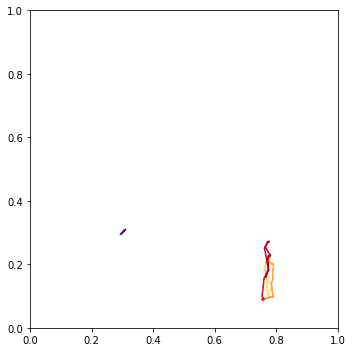

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

plt.xlim(xmin=0)
plt.xlim(xmax=1)

plt.ylim(ymin=0)
plt.ylim(ymax=1)
for i in range(len(xs)-2):
  plt.plot(xs[i:i+2], ys[i:i+2], ',', linestyle="solid", c=color1[i])
  plt.plot(yr[i:i+2], yr[i:i+2], ',', linestyle="solid", c=color2[i])
plt.show

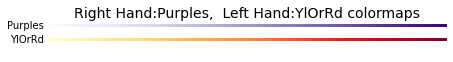

In [ ]:
plot_color_gradients('Right Hand:Purples,  Left Hand:YlOrRd',
                     ['Purples','YlOrRd'])

# ViT

In [ ]:
pip install vformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 112 kB 16.2 MB/s 
     |████████████████████████████████| 59 kB 8.5 MB/s 
     |████████████████████████████████| 133 kB 63.6 MB/s 
     |████████████████████████████████| 97 kB 8.0 MB/s 
     |████████████████████████████████| 338 kB 58.3 MB/s 
     |████████████████████████████████| 138 kB 42.7 MB/s 
     |████████████████████████████████| 178 kB 67.9 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 297 kB 70.1 MB/s 
     |████████████████████████████████| 636 kB 52.4 MB/s 
     |████████████████████████████████| 62 kB 822 kB/s 
     |████████████████████████████████| 97 kB 8.0 MB/s 
     |████████████████████████████████| 191 kB 55.3 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 98 kB

In [ ]:
import torch
from vformer.models.classification import CCT

In [ ]:
image = torch.randn(1, 3, 224, 224)       # Example data
model = CCT(
        img_size=224,
        patch_size=4,
        in_channels=3,
        seq_pool=True,
        embedding_dim=768,
        num_layers=1,
        head_dim=96,
        num_heads=1,
        mlp_ratio=4.0,
        n_classes=10,
        p_dropout=0.1,
        attn_dropout=0.1,
        drop_path=0.1,
        positional_embedding="learnable",
        decoder_config=(
            768,
            1024,
        ),
        pooling_kernel_size=3,
        pooling_stride=2,
        pooling_padding=1
    )
logits = model(image)

In [ ]:
logits.shape

torch.Size([1, 10])

In [ ]:
logits

tensor([[ 0.1271, -0.6819, -0.3130,  0.3263, -0.2941,  1.0014, -0.4640, -0.3839,
         -0.8703,  0.0079]], grad_fn=<AddmmBackward0>)